<a href="https://colab.research.google.com/github/roshan-pasha/Machine-Learning/blob/master/Loan_Prediction_Analytics_Vidhya_17_01_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loan Prediction - Analytics Vidhya (started 17-01-2020)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

In [2]:
upload_train = files.upload()

Saving train_ctrUa4K.csv to train_ctrUa4K.csv


In [3]:
upload_test = files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG.csv


In [4]:
upload_samplesubmission = files.upload()

Saving sample_submission_49d68Cx.csv to sample_submission_49d68Cx.csv


In [0]:
sample_submission = pd.read_csv(io.BytesIO(upload_samplesubmission['sample_submission_49d68Cx.csv']))

In [14]:
sample_submission.sample()


,Loan_ID,Loan_Status
65,LP001351,N


In [0]:
train = pd.read_csv(io.BytesIO(upload_train['train_ctrUa4K.csv']))
test = pd.read_csv(io.BytesIO(upload_test['test_lAUu6dG.csv']))

In [311]:
train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
170,LP001581,Male,Yes,0,Not Graduate,NaN,1820,1769.0,95.0,360.0,1.0,Rural,Y
419,LP002347,Male,Yes,0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Semiurban,Y
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
430,LP002377,Female,No,1,Graduate,Yes,8624,0.0,150.0,360.0,1.0,Semiurban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y


In [312]:
train.shape

(614, 13)

In [313]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [314]:
test.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
176,LP002007,Male,Yes,2,Not Graduate,No,2500,3333,131.0,360.0,1.0,Urban
201,LP002107,Male,Yes,3+,Not Graduate,No,2855,542,90.0,360.0,1.0,Urban
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [315]:
test.shape

(367, 12)

In [316]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [317]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [318]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [319]:
train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [0]:
# This is to ceate a new DF for NAN values 
train_nan = train[train.isna().any(axis=1)]

In [321]:
train[train['Gender'].isna()]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [322]:
train.Gender.value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [323]:
train.Married.value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [324]:
train.Education.value_counts(dropna = False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [325]:
train.Self_Employed.value_counts(dropna = False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [326]:
train.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [327]:
train[train['Gender'].notnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


As we tried to see all possible pattrens whether the Nan's in Gender column can be filled by understanding any pattren of other columns but we havent found such pattren. So we are replacing the Nan with Mode.

In [328]:
# Here we can see that the Loan amount is a continous variable , so the reasn we are using mean to replace nan
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [329]:
# As we have checked the data with the describe and seen pattren that majority of data is following tenure of 360. So we take Mode
train.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [330]:
# We are going with mode
train.Dependents.value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [331]:
#We will go with mode
train.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [332]:
train.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [333]:
train.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [0]:
#Manually ipdating the fillna as tried to update through mode by running for loop , coe is getting executed but Nan are not getting updated
train['Gender'].fillna('Male', inplace=True)
train['Married'].fillna('Yes',inplace=True)
train['Dependents'].fillna('0',inplace=True)
train['Self_Employed'].fillna('No',inplace = True)
train['Loan_Amount_Term'].fillna(360.0,inplace = True)
train['Credit_History'].fillna(1.0,inplace = True)
train['LoanAmount'].fillna(146.41,inplace = True)

In [335]:
train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.00,180.0,1.0,Urban,N
363,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.00,300.0,1.0,Urban,Y
174,LP001603,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.00,360.0,1.0,Semiurban,N
387,LP002243,Male,Yes,0,Not Graduate,No,3010,3136.0,146.41,360.0,0.0,Urban,N
53,LP001179,Male,Yes,2,Graduate,No,4616,0.0,134.00,360.0,1.0,Urban,N


In [0]:
train.Loan_Status = train['Loan_Status'].map({'Y' : 1 , 'N' : 0})

In [337]:
#So we can see that we have good churn rate/ Loan_status and data is not Imbalanced
100*(train['Loan_Status'].sum()/train['Loan_Status'].count()).round(4)

68.73

In [0]:
test = test.replace(to_replace="3+", value = '3')
train = train.replace(to_replace ="3+", value ='3') 

In [0]:
train['Gender'] = train['Gender'].map({'Male':1,'Female': 0})
train['Married'] = train['Married'].map({'Yes':1,'No': 0})
train['Education'] = train['Education'].map({'Graduate':1,'Not Graduate': 0})
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1,'No': 0})
train['Property_Area'] = train['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural': 0})


In [340]:
train.Married.unique()

array([0, 1])

In [341]:
train.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

In [342]:
train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
481,LP002536,1,1,3,0,0,3095,0.0,113.0,360.0,1.0,0,1
307,LP001994,0,0,0,1,0,2400,1863.0,104.0,360.0,0.0,2,0
589,LP002926,1,1,2,1,1,2726,0.0,106.0,360.0,0.0,1,0
549,LP002777,1,1,0,1,0,2785,2016.0,110.0,360.0,1.0,0,1
310,LP002002,0,0,0,1,0,2917,0.0,84.0,360.0,1.0,1,1
531,LP002720,1,1,3,1,0,4281,0.0,100.0,360.0,1.0,2,1
458,LP002472,1,0,2,1,0,4354,0.0,136.0,360.0,1.0,0,1
34,LP001100,1,0,3,1,0,12500,3000.0,320.0,360.0,1.0,0,0
492,LP002571,1,0,0,0,0,3691,0.0,110.0,360.0,1.0,0,1
173,LP001594,1,1,0,1,0,5708,5625.0,187.0,360.0,1.0,1,1


In [343]:
# Now treating Data manuplation and handling Nan for test data
test.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
20,LP001121,Male,Yes,1,Not Graduate,No,1888,1620,48.0,360.0,1.0,Urban
247,LP002360,Male,Yes,NaN,Graduate,No,10000,0,NaN,360.0,1.0,Urban


In [0]:
test['Gender'].fillna('Male', inplace=True)
test['Married'].fillna('Yes',inplace=True)
test['Dependents'].fillna('0',inplace=True)
test['Self_Employed'].fillna('No',inplace = True)
test['Loan_Amount_Term'].fillna(360.0,inplace = True)
test['Credit_History'].fillna(1.0,inplace = True)
test['LoanAmount'].fillna(146.41,inplace = True)

In [0]:
test['Gender'] = test['Gender'].map({'Male':1,'Female': 0})
test['Married'] = test['Married'].map({'Yes':1,'No': 0})
test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate': 0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1,'No': 0})
test['Property_Area'] = test['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural': 0})

In [0]:
train_copy = train

In [347]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## `EDA `

### Treating Outliers

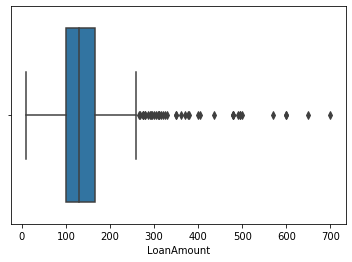

In [348]:
sns.boxplot(x = 'LoanAmount', data = train)
plt.show()

In [349]:
train.LoanAmount.describe(percentiles = [0.2,0.4,0.5,0.7,0.8,0.9,0.95,0.99])

count    614.000000
mean     146.412085
std       84.037468
min        9.000000
20%       96.000000
40%      119.200000
50%      129.000000
70%      155.000000
80%      180.000000
90%      229.400000
95%      293.400000
99%      495.870000
max      700.000000
Name: LoanAmount, dtype: float64

In [350]:
train.LoanAmount.unique()

array([146.41, 128.  ,  66.  , 120.  , 141.  , 267.  ,  95.  , 158.  ,
       168.  , 349.  ,  70.  , 109.  , 200.  , 114.  ,  17.  , 125.  ,
       100.  ,  76.  , 133.  , 115.  , 104.  , 315.  , 116.  , 112.  ,
       151.  , 191.  , 122.  , 110.  ,  35.  , 201.  ,  74.  , 106.  ,
       320.  , 144.  , 184.  ,  80.  ,  47.  ,  75.  , 134.  ,  96.  ,
        88.  ,  44.  , 286.  ,  97.  , 135.  , 180.  ,  99.  , 165.  ,
       258.  , 126.  , 312.  , 136.  , 172.  ,  81.  , 187.  , 113.  ,
       176.  , 130.  , 111.  , 167.  , 265.  ,  50.  , 210.  , 175.  ,
       131.  , 188.  ,  25.  , 137.  , 160.  , 225.  , 216.  ,  94.  ,
       139.  , 152.  , 118.  , 185.  , 154.  ,  85.  , 259.  , 194.  ,
        93.  , 370.  , 182.  , 650.  , 102.  , 290.  ,  84.  , 242.  ,
       129.  ,  30.  , 244.  , 600.  , 255.  ,  98.  , 275.  , 121.  ,
        63.  , 700.  ,  87.  , 101.  , 495.  ,  67.  ,  73.  , 260.  ,
       108.  ,  58.  ,  48.  , 164.  , 170.  ,  83.  ,  90.  , 166.  ,
      

In [0]:
#As the there are outliers in feature LoanAmount, as we can see Max = 700 and 99% = 495 and 95% = 293
# So we will treat outliers as we rename the 5% of data to 293 (614/5%  = 30 records as 293)

In [352]:
train['LoanAmount'][train['LoanAmount'] > 293] =293

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


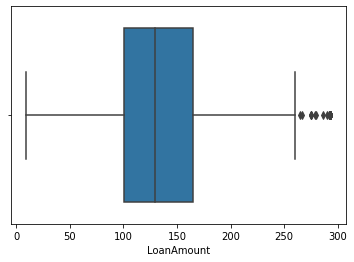

In [353]:
sns.boxplot(x = 'LoanAmount', data = train)
plt.show()

In [0]:
# 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


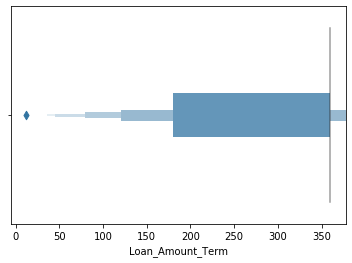

In [355]:
sns.boxenplot(x = 'Loan_Amount_Term', data = train)
plt.show()

In [356]:
# As we can see there are less than 1% of outliers , so we will ignore
train.Loan_Amount_Term.describe(percentiles=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.8,0.9,0.95,0.99])

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
1%        84.000000
5%       180.000000
10%      300.000000
20%      360.000000
30%      360.000000
40%      360.000000
50%      360.000000
80%      360.000000
90%      360.000000
95%      360.000000
99%      480.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

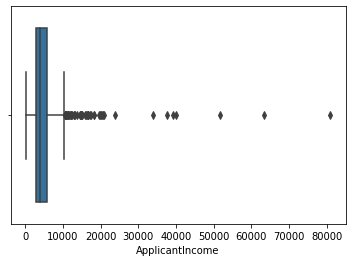

In [357]:
sns.boxplot(x = 'ApplicantIncome',data = train)
plt.show()

In [358]:
#As we can clearly see the ouliers and we will take a cutoff of 95th Percentile and group it as high income group
train.ApplicantIncome.describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.999])

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
10%       2216.100000
20%       2605.400000
30%       3050.400000
40%       3406.800000
50%       3812.500000
60%       4343.600000
70%       5185.600000
80%       6252.400000
90%       9459.900000
95%      14583.000000
99%      32540.410000
99.9%    70172.581000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [359]:
train['ApplicantIncome'][train['ApplicantIncome']> 14583]  = 14583

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


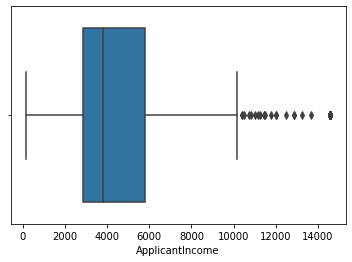

In [360]:
sns.boxplot(x = 'ApplicantIncome', data = train)
plt.show()

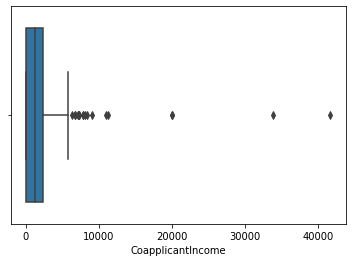

In [361]:
sns.boxplot(x = 'CoapplicantIncome', data = train)
plt.show()


In [362]:
train.CoapplicantIncome.describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.95,0.99,0.999])

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%       1188.500000
60%       1689.600000
70%       2083.000000
80%       2535.000000
95%       4997.400000
99%       8895.890000
99.9%    36867.210000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [363]:
train['CoapplicantIncome'][train['CoapplicantIncome']>4997] = 4997

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


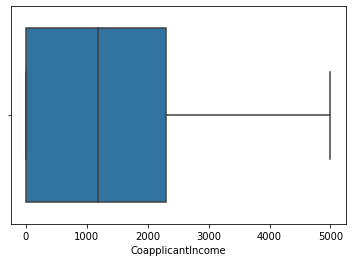

In [364]:
sns.boxplot(x = 'CoapplicantIncome', data = train)
plt.show()

In [365]:
train.shape

(614, 13)

In [0]:
train = train.drop(['Loan_ID'],axis=1)
test = test.drop(['Loan_ID'],axis = 1)

In [373]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null float64
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
dtypes: float64(4), int64(7)
memory usage: 31.7 KB


In [0]:
train["Dependents"] = train.Dependents.astype(float)
test["Dependents"] = test.Dependents.astype(float)

In [0]:
X_train = train.drop(['Loan_Status'],axis = 1)
y_train = train['Loan_Status']

In [0]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [0]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [377]:
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [378]:
rfc.feature_importances_

array([0.01849678, 0.02449475, 0.04986332, 0.02363496, 0.02022484,
       0.20327224, 0.1114549 , 0.18575677, 0.04459769, 0.26715951,
       0.05104425])

In [0]:
y_pred = rfc.predict(test)

In [394]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [0]:
sample_submission.Loan_Status = y_pred

In [0]:
sample_submission['Loan_Status'] = sample_submission['Loan_Status'].map({1 : 'Y',0: 'N'})

In [397]:
sample_submission.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [0]:
sample_submission.to_csv('submission_1.csv')

In [400]:
!cp submission_1.csv drive/My\ Drive

cp: cannot create regular file 'drive/My Drive': No such file or directory


In [0]:
import xgboost

In [392]:
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = classifier.predict(test)